In [6]:
import numpy as np
from scipy.linalg import eigh
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn import decomposition

In [39]:
data = pd.read_csv("mnist.csv")
print(data.shape)
data = data[0:1000]
labels = data.pop("label") # Exclude the target from the dataframe
data.head()

(42000, 785)


,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### 1. standardizing the data

In [40]:
sample_data = StandardScaler().fit_transform(data)
print(sample_data.shape)

(1000, 784)


### 2. Covariance matrix

In [45]:
# A^T*A
# matrix multiplication with numpy
covar_matrix = np.matmul(sample_data.T, sample_data)
print('Shape of covariance matrix:', covar_matrix.shape)

Shape of covariance matrix: (784, 784)


### 3. Compute eigenvalues and eigenvectors

In [46]:
# the parameter ‘eigvals’ is defined (low value to heigh value) 
# eigh function will return the eigen values in asending order
# this code generates only the top 2 (782 and 783)(index) eigenvalues.
# 4. feature vector
values, vectors = eigh(covar_matrix, eigvals=(782, 783))
print('shape of eigen vectors', vectors.shape)


shape of eigen vectors (784, 2)


In [47]:
# converting the eigen vectors into (2,d) shape for easyness of further computations
vectors = vectors.T
print('shape of eigen vectors', vectors.shape)
# here the vectors[1] represent the eigen vector corresponding 1st principal eigen vector
# here the vectors[0] represent the eigen vector corresponding 2nd principal eigen vector

shape of eigen vectors (2, 784)


In [48]:
# 5. Recast with PC
new_coordinates = np.matmul(vectors, sample_data.T)

In [49]:

new_coordinates = np.vstack((new_coordinates, labels)).T

In [50]:
dataframe = pd.DataFrame(data=new_coordinates, columns=('1st_principal', '2nd_principal', 'label'))
dataframe.head()

,1st_principal,2nd_principal,label
0,-6.065084,-5.166641,1.0
1,4.575014,18.631222,0.0
2,-2.468608,-7.647340,1.0
3,2.429640,-1.122921,4.0
4,5.547535,25.357884,0.0


/Users/evahegnar/opt/miniconda3/envs/pred_env/lib/python3.9/site-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


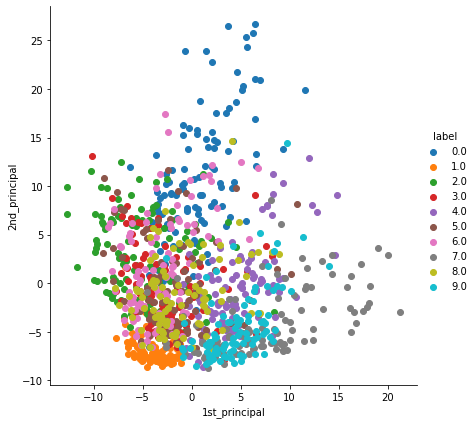

In [54]:
sn.FacetGrid(dataframe, hue='label', size=6).map(plt.scatter, '1st_principal', '2nd_principal').add_legend();

In [55]:
pca = decomposition.PCA(n_components = 300)
# PCA for dimension reduction
pca_data = pca.fit_transform(sample_data)

In [56]:
percentage_var_expl = pca.explained_variance_ / np.sum(pca.explained_variance_)
cum_var_expl = np.cumsum(percentage_var_expl)

Text(0, 0.5, 'cumulative_explined_variance')

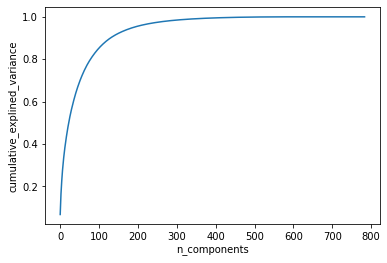

In [57]:
plt.figure(figsize=(6,4))
plt.plot(cum_var_expl)
plt.xlabel('n_components')
plt.ylabel('cumulative_explined_variance')